# Glass identification


The dataset describes the chemical properties of glass and involves classifying samples of glass using their chemical properties as one of six classes. The dataset was credited to Vina Spiehler in 1987. The study of classification of types of glass was motivated by criminological investigation. At the scene of the crime, the glass left can be used as evidence...if it is correctly identified!

The chemical compositions are measured as the weight percent in corresponding oxide.
Attribute Information-
1.	 Id number: 1 to 214
2.	 RI: refractive index
3.	Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
4.	Mg: Magnesium
5.	Al: Aluminum
6.	Si: Silicon
7.	K: Potassium
8.	Ca: Calcium
9.	Ba: Barium
10.	Fe: Iron
11.	Type of glass: (class attribute)
•	1- building_windows_float_processed
•	2- building_windows_non_float_processed
•	3- vehicle_windows_float_processed
•	4- vehicle_windows_non_float_processed (none in this database)
•	5- containers
•	6- tableware
•	7- headlamps
There are 214 observations in the dataset. The dataset can be divided into window glass (classes 1-4) and non-window glass (classes 5-7). 
Predict : Type of glass


In [257]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [359]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing 
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report

# Exploratory Data anlysis and preprocessing 

In [360]:
df=pd.read_csv('/Users/rekhagrg/Downloads/glassdataset (3).csv')
df

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [361]:
Y=df["Type of glass"]
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: Type of glass, dtype: int64

In [362]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id number      214 non-null    int64  
 1   RI             214 non-null    float64
 2   Na             214 non-null    float64
 3   Mg             214 non-null    float64
 4   Al             214 non-null    float64
 5   Si             214 non-null    float64
 6   K              214 non-null    float64
 7   Ca             214 non-null    float64
 8   Ba             214 non-null    float64
 9   Fe             214 non-null    float64
 10  Type of glass  214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


In [363]:
df.describe()

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,54.250000,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [364]:
#check for missing value
print(df.isnull().sum())

Id number        0
RI               0
Na               0
Mg               0
Al               0
Si               0
K                0
Ca               0
Ba               0
Fe               0
Type of glass    0
dtype: int64


In [365]:
#There are 0 Na in the dataset

In [366]:
#Now lets remove the ID

In [367]:
df=df.drop(columns=['Id number'])
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [368]:
df.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type of glass'], dtype='object')

In [369]:
x=df.drop(columns=['Type of glass'])

In [370]:
#As we can see all values are numeric, we can proceed to normalize the values

In [371]:
# x=df.values #return a numpy array
# min_max_scaler=preprocessing.MinMaxScaler()
# x_scaled=min_max_scaler.fit_transform(x)
# df=pd.DataFrame(x_scaled)
# df

# Splitting the data into training samples and testing samples

#divide the given dataset into train and test data with a 7:3 ratio using skleran's train_test_split function.

In [372]:
import numpy as np
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(x,Y,test_size=0.30,random_state=42)
print(X_train.shape)
print(X_test.shape)

(149, 9)
(65, 9)


# Now by using  differnrt classification techniques and finding the accuracy of the model

In [291]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

# Assuming X_train, X_test, y_train, y_test are defined properly
# X_train: Training features
# X_test: Testing features
# y_train: Training labels
# y_test: Testing labels


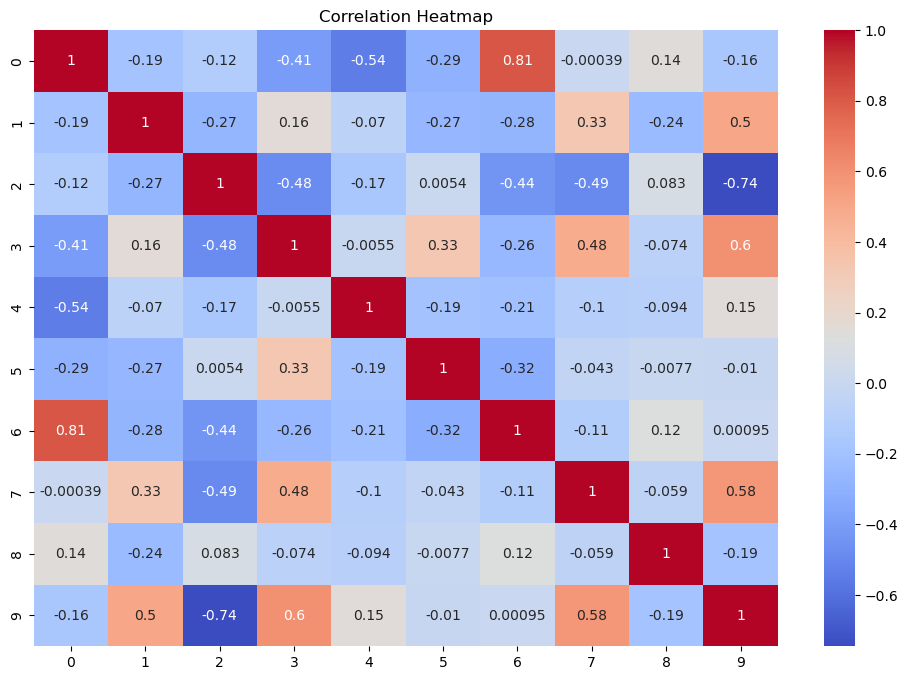

In [287]:
#lets calculate correlations using heatmap
correlations = df.corr()

# Visualize correlations using a heatmap
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
sns.heatmap(correlations, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [288]:
# Initialize models
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(),
    "Naive Bayes": GaussianNB()
}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy:", accuracy)


Decision Tree Accuracy: 1.0
KNN Accuracy: 0.9076923076923077
Random Forest Accuracy: 1.0
Logistic Regression Accuracy: 0.9538461538461539
Naive Bayes Accuracy: 1.0


/Users/rekhagrg/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/rekhagrg/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

In [375]:
predictions_df = X_test.copy()

model=DecisionTreeClassifier()
# Assuming you have a model named 'clf' and an array of features named 'X'

# Train the model and make predictions
model.fit(X_train, y_train)
predictions = model.predict(X_test)


# Iterate through predictions and print the predicted class
predictions_df['Predicted Glass Type'] = predictions

# Add the original target labels to the predictions_df
predictions_df['Original Glass Type'] = y_test.values

# Display the updated DataFrame
print(predictions_df)

          RI     Na    Mg    Al     Si     K     Ca    Ba    Fe  \
9    1.51755  13.00  3.60  1.36  72.99  0.57   8.40  0.00  0.11   
197  1.51727  14.70  0.00  2.34  73.28  0.00   8.95  0.66  0.00   
66   1.52152  13.05  3.65  0.87  72.22  0.19   9.85  0.00  0.17   
191  1.51602  14.85  0.00  2.38  73.28  0.00   8.76  0.64  0.09   
117  1.51708  13.72  3.68  1.81  72.06  0.64   7.88  0.00  0.00   
..       ...    ...   ...   ...    ...   ...    ...   ...   ...   
5    1.51596  12.79  3.61  1.62  72.97  0.64   8.07  0.00  0.26   
135  1.51789  13.19  3.90  1.30  72.33  0.55   8.44  0.00  0.28   
56   1.51215  12.99  3.47  1.12  72.98  0.62   8.35  0.00  0.31   
199  1.51609  15.01  0.00  2.51  73.05  0.05   8.83  0.53  0.00   
173  1.52043  13.38  0.00  1.40  72.25  0.33  12.50  0.00  0.00   

     Predicted Glass Type  Original Glass Type  
9                       1                    1  
197                     7                    7  
66                      3                    1  

In [376]:
predictions_df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Predicted Glass Type,Original Glass Type
9,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.00,0.11,1,1
197,1.51727,14.70,0.00,2.34,73.28,0.00,8.95,0.66,0.00,7,7
66,1.52152,13.05,3.65,0.87,72.22,0.19,9.85,0.00,0.17,3,1
191,1.51602,14.85,0.00,2.38,73.28,0.00,8.76,0.64,0.09,7,7
117,1.51708,13.72,3.68,1.81,72.06,0.64,7.88,0.00,0.00,2,2
...,...,...,...,...,...,...,...,...,...,...,...
5,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1,1
135,1.51789,13.19,3.90,1.30,72.33,0.55,8.44,0.00,0.28,2,2
56,1.51215,12.99,3.47,1.12,72.98,0.62,8.35,0.00,0.31,1,1
199,1.51609,15.01,0.00,2.51,73.05,0.05,8.83,0.53,0.00,7,7
